# 맷플롯립을 활용한 기상정보 데이터 분석

In [1]:
# 한글 폰트 설치 및 적용
# fc-cache: succeeded 확인 후 [런타임 다시 시작] 할 것.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,000 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and dire

In [1]:
import pandas as pd

df = pd.read_csv("20041115_천승용.csv", encoding='cp949')
df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,159,부산,2004-11-01,16.3,12.3,724,21.6,1301
1,159,부산,2004-11-02,14.7,11.4,2354,19.4,1337
2,159,부산,2004-11-03,13.3,11.0,513,17.1,1526
3,159,부산,2004-11-04,13.3,9.2,710,19.2,1430
4,159,부산,2004-11-05,14.3,10.0,603,19.9,1331


In [10]:
df.rename(columns = {'평균기온(°C)' : '평균기온'}, inplace=True)
df.rename(columns = {'최저기온(°C)' : '최저기온'}, inplace=True)
df.rename(columns = {'최고기온(°C)' : '최고기온'}, inplace=True)

In [11]:
df['일시'] = pd.to_datetime(df['일시'], format='%Y-%m-%d')

In [12]:
df2 = df.set_index('일시')

In [13]:
df_Mar = df2[pd.DatetimeIndex(df2.index).month == 11]
df_Mar

,지점,지점명,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi)
일시,,,,,,,
2004-11-01,159,부산,16.3,12.3,724,21.6,1301
2004-11-02,159,부산,14.7,11.4,2354,19.4,1337
2004-11-03,159,부산,13.3,11.0,513,17.1,1526
2004-11-04,159,부산,13.3,9.2,710,19.2,1430
2004-11-05,159,부산,14.3,10.0,603,19.9,1331
2004-11-06,159,부산,15.8,12.2,2346,21.1,1347
2004-11-07,159,부산,15.7,11.9,206,21.3,1304
2004-11-08,159,부산,15.8,12.0,653,21.1,1233
2004-11-09,159,부산,16.4,11.8,711,22.2,1213


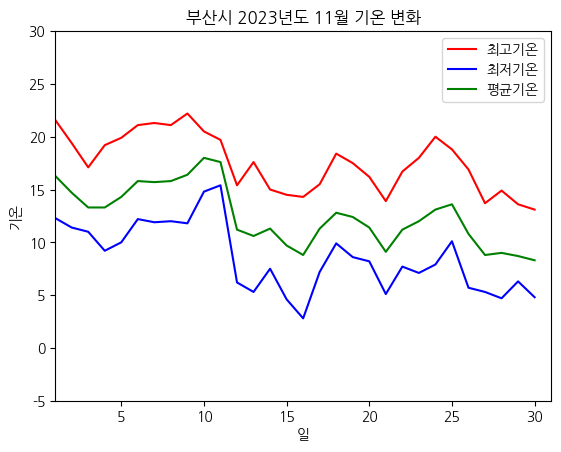

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

plt.title("부산시 2023년도 11월 기온 변화")

plt.plot(range(1, len(df_Mar)+1), df_Mar['최고기온'], label='최고기온', c='r')
plt.plot(range(1, len(df_Mar)+1), df_Mar['최저기온'], label='최저기온', c='blue')
plt.plot(range(1, len(df_Mar)+1), df_Mar['평균기온'], label='평균기온', c='green')
plt.xlabel('일')
plt.ylabel('기온')
plt.xlim(1,31)
plt.ylim(-5, 30)
plt.legend()

plt.show()

plt.savefig('2023_11월_부산기온.png')